In [1]:
# !pip install -e .

# Imports

In [2]:
import functools
import random
import time
from arc.interface import Board, BoardPair
from arc.utils.dataset import get_riddles
from arcmentations import functional
from arcmentations.augmentations.color import RandomColor
from arcmentations.augmentations.helpers import same_aug_for_all_pairs_helper, same_aug_for_riddle_helper
from arcmentations.augmentations.spatial import DirectionTypeRandomDouble, RandomDoubleInputBoard, RandomRotate, RandomReflect
from arcmentations.vis_helpers import plot_task
from arcmentations.augmentations import RandomCropInputAndOuput

# Load riddles

In [7]:
train_riddles = get_riddles(["training"])

2022-08-05 07:23:33.692 | INFO     | arc.utils.dataset:get_riddles:96 - Loading riddles from ['training']


# Original riddle

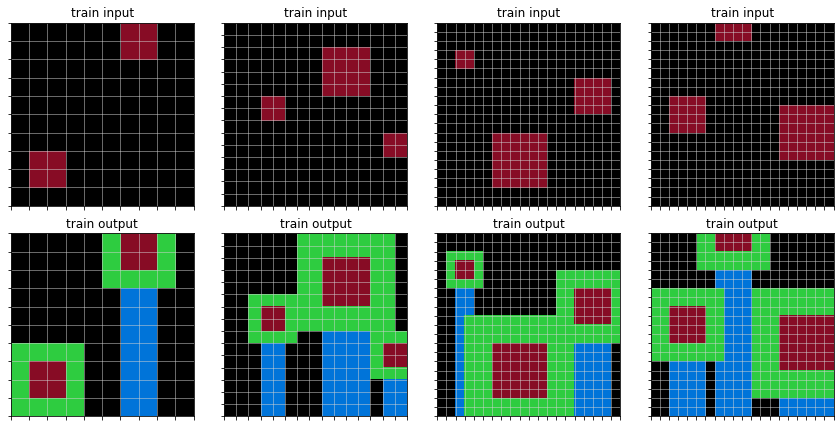

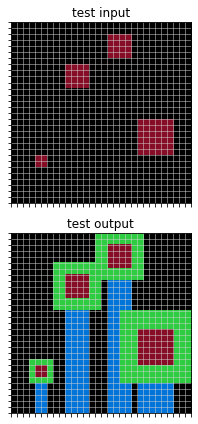

In [8]:
riddle = train_riddles[27]
plot_task(riddle)

# Permute color

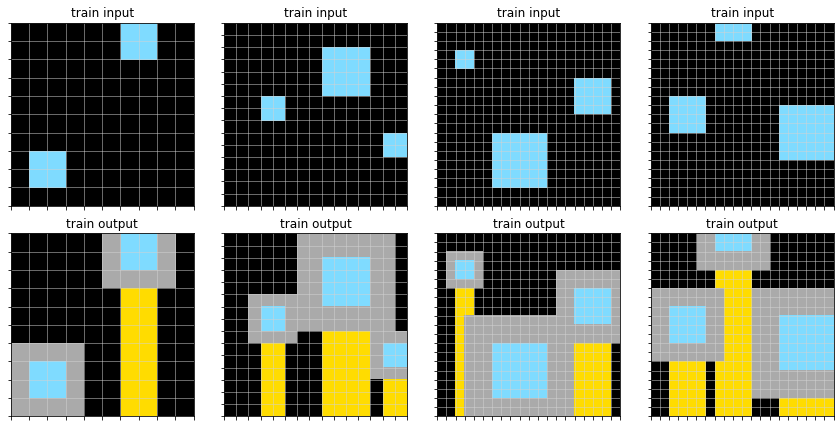

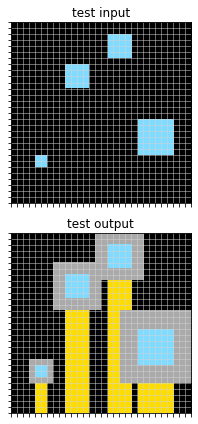

In [9]:
params = RandomColor.get_params(seed=random.random(), include_0=False)
aug_riddle = same_aug_for_riddle_helper(riddle, functional.permute_color, True, params_in=params)
plot_task(aug_riddle)

# RandomCropInputAndOuput

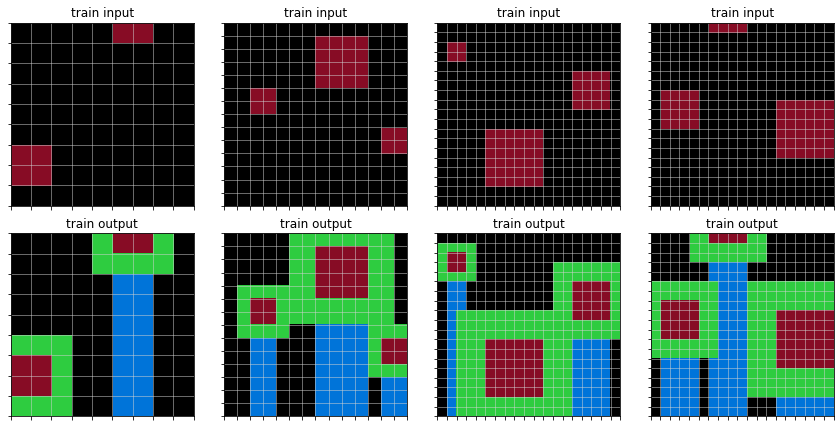

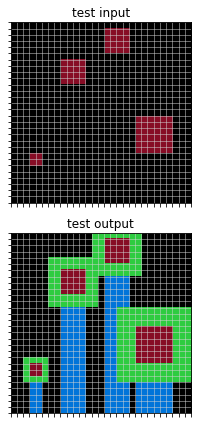

In [10]:
params = RandomCropInputAndOuput.get_params(seed=random.random(), cols_to_crop=range(5), rows_to_crop=range(5))
aug_riddle = same_aug_for_riddle_helper(riddle, functional.cropInputAndOutput, True, params_in=params)
plot_task(aug_riddle)

# Double input board

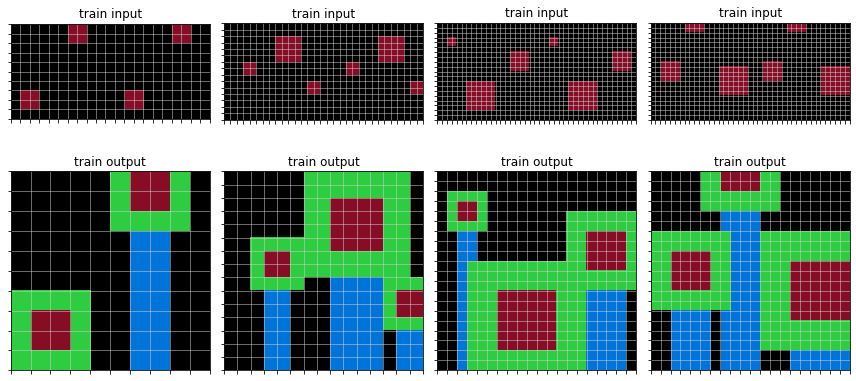

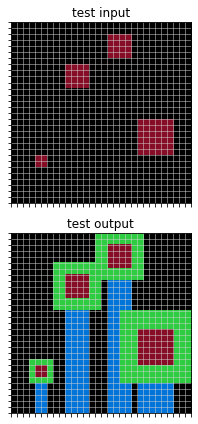

In [11]:
aug = RandomDoubleInputBoard(random.random(), True)
aug_riddle = riddle.copy()
aug_riddle.train = aug(riddle.train)
plot_task(aug_riddle)

# Rotate

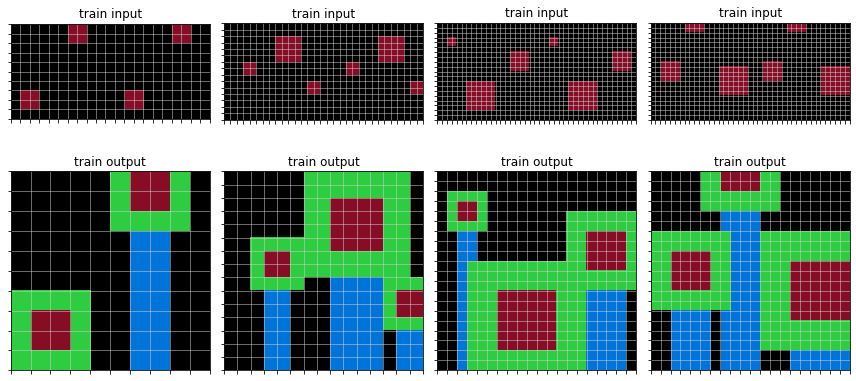

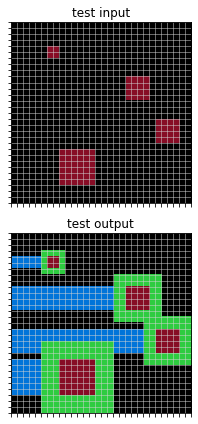

In [12]:
aug = RandomRotate(random.random(), True)
aug_riddle = riddle.copy()
aug_riddle.train = aug(riddle.train)
aug_riddle.test = aug(riddle.test)
plot_task(aug_riddle)

# Reflect

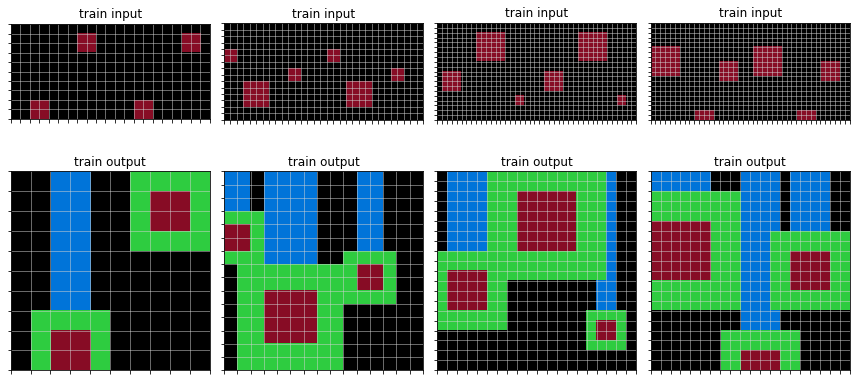

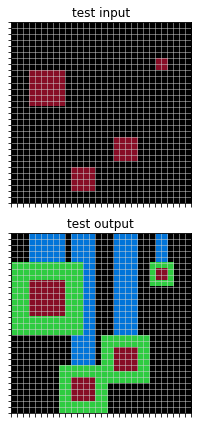

In [13]:
aug = RandomReflect(random.random(), True)
aug_riddle = riddle.copy()
aug_riddle.train = aug(riddle.train)
aug_riddle.test = aug(riddle.test)
plot_task(aug_riddle)

# Chain them all together

In [35]:
augs = [
    RandomColor(random.random(), include_0=False, same_aug_for_all_pairs=True),
    RandomCropInputAndOuput(random.random(), True),
    RandomDoubleInputBoard(random.random(), True),
    RandomRotate(random.random(), True),
    RandomReflect(random.random(), True),
]

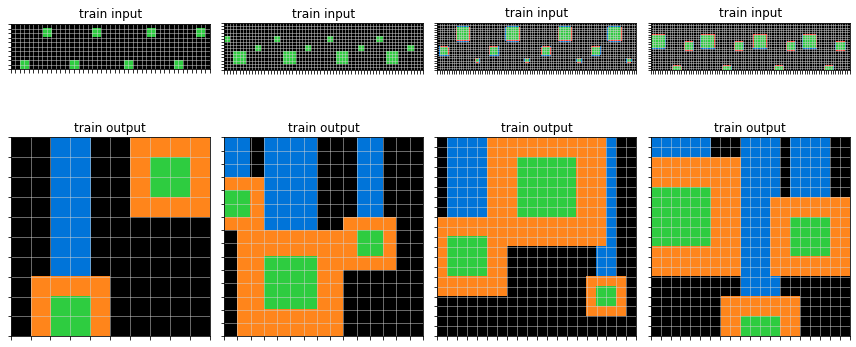

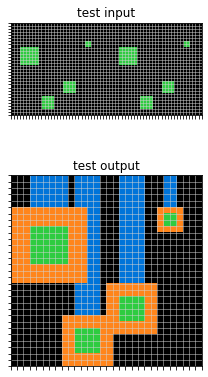

In [42]:
aug_riddle = riddle.copy()
aug_boards = functools.reduce(lambda val,func: func(val), augs, aug_riddle.train + aug_riddle.test)
aug_riddle.train, aug_riddle.test = aug_boards[:len(aug_riddle.train)], aug_boards[len(aug_riddle.train):]
plot_task(aug_riddle)